In [40]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Data Dependecies 

In [41]:
df = pd.read_csv("transaction.csv")

# Extracting User Profile

In [57]:
df = df[df["CustomerID"] == 1 ]

In [ ]:
df["Transaaction Percent"] = 100*(df["Amount"]/df["AccountBalance"])

In [59]:
df["Avg Amout Dev"] = ((df["Amount"] - df["Amount"].mean())/df["Amount"])*100

In [60]:
total_amount_per_month = df.groupby(['Year', 'Month'])['Amount'].sum().reset_index()

# Merge the total amount back into the original DataFrame
df = pd.merge(df, total_amount_per_month, on=['Year', 'Month'], suffixes=('', '_PerMonth'))



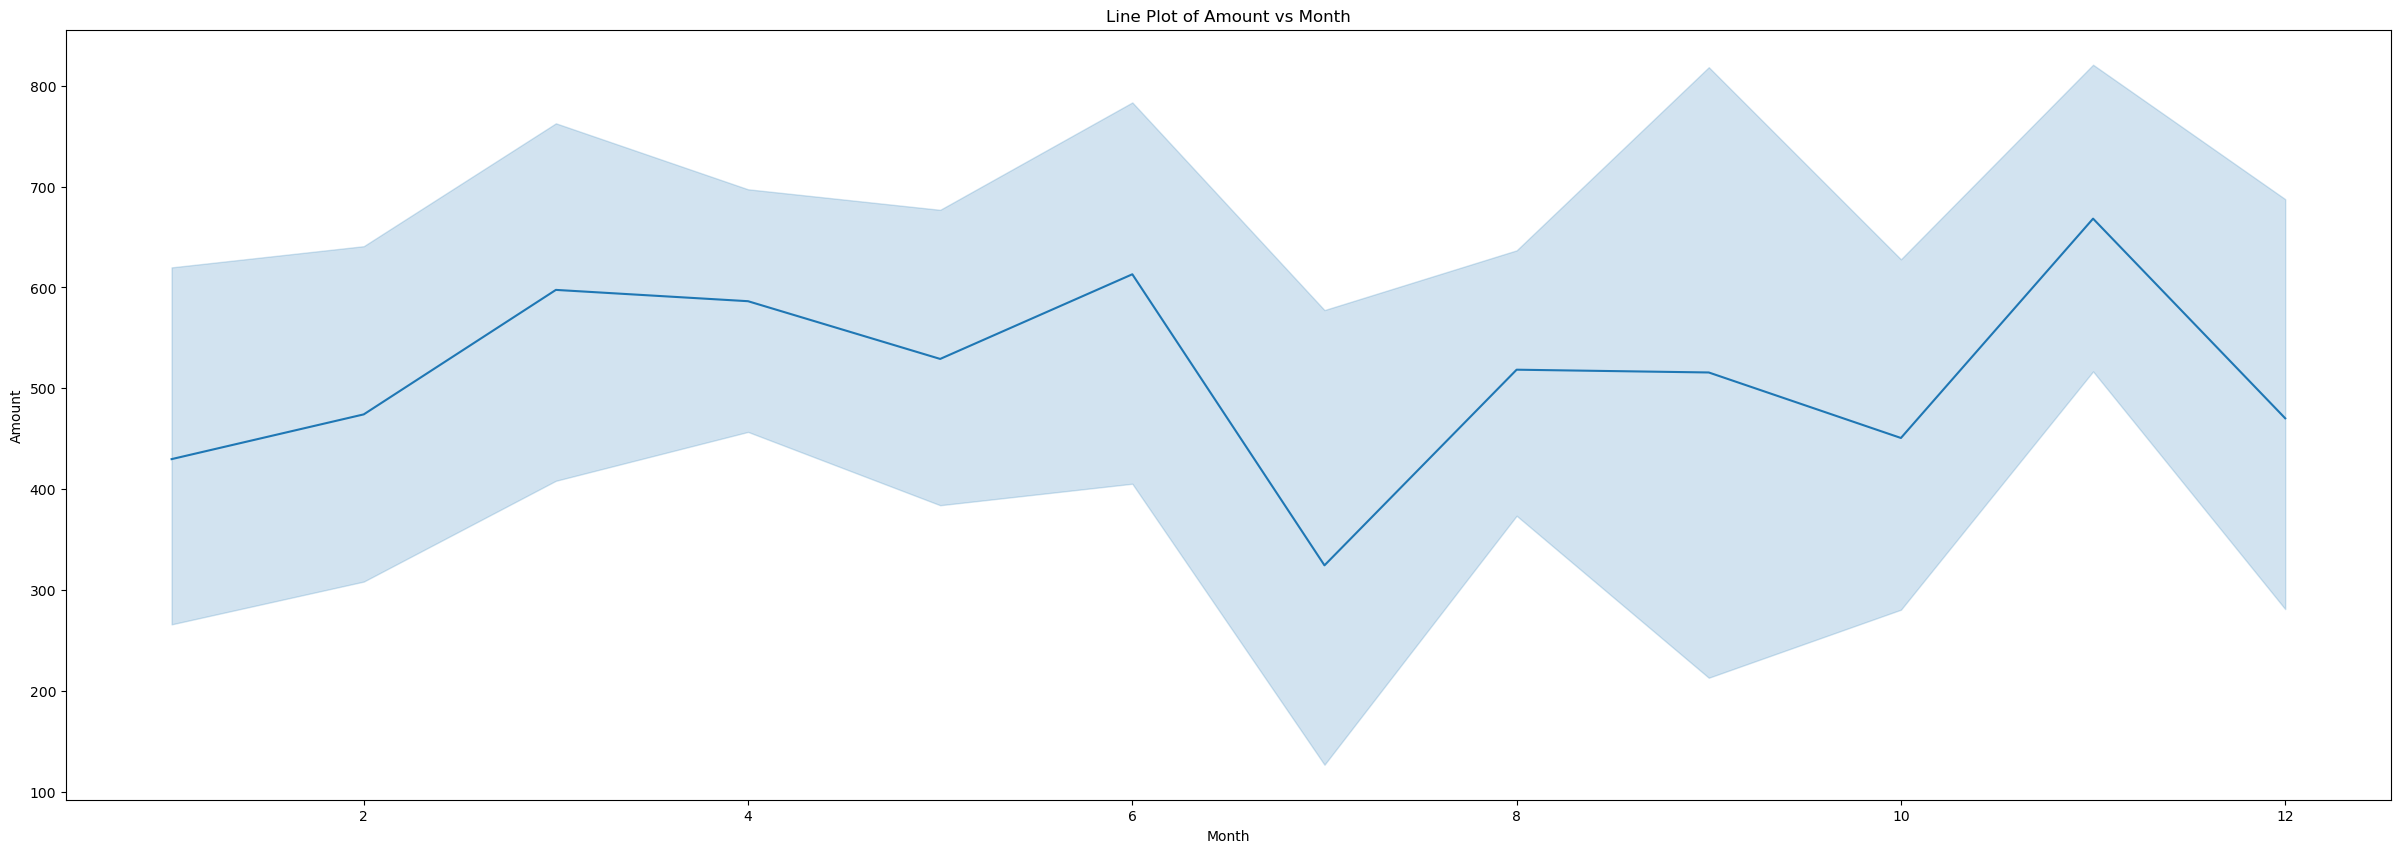

In [61]:
# Create a line plot using seaborn
plt.figure(figsize=(30, 10))
sns.lineplot(x='Month', y='Amount', data=df, marker='')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Line Plot of Amount vs Month')

# Show the plot
plt.show()

In [62]:
category_mapping = {
    'Retail': 1,
    'Online': 2,
    'Travel': 3,
    'Food': 4,
    'Other': 5,
}

# Applying the mapping
df['Category'] = df['Category'].map(category_mapping)

# Transaction Frequency

In [63]:
frequency_per_month = df.groupby(['Category', 'Month'])['CustomerID'].count().unstack().fillna(0)
print("Matrix 1: Transaction Frequency per Month for each Category")
df = df.merge(frequency_per_month, how='left', left_on='Category', right_index= True, suffixes=('_TransactionFrequency', ''))


Matrix 1: Transaction Frequency per Month for each Category


In [64]:
df['Amountdif'] = df['Amount'].diff().fillna(0)

# AVG Transaction Size

In [65]:
df.iloc[0]

AnomalyScore                0.444029
MerchantID               6693.000000
Amount                    686.720000
CustomerID                  1.000000
SuspiciousFlag              1.000000
AccountBalance           2051.500000
Year                     2022.000000
Month                       6.000000
Day                         1.000000
DayOfWeek                   1.000000
Hour                        8.000000
Minute                     40.000000
Year_Login               2021.000000
Month_Login                 6.000000
Category                         NaN
Transaaction Percent       33.474043
Avg Amout Dev              24.628975
Amount_PerMonth         23968.580000
1                          16.000000
2                          14.000000
3                          16.000000
4                          14.000000
5                          15.000000
6                          16.000000
7                          15.000000
8                          15.000000
9                          16.000000
1

# Getting Moving Average Of Transacation (Time Series Analysis)

ADF Statistic: -5.215479556587829
p-value: 8.17434823725802e-06
Critical Values: {'1%': -3.5078527246648834, '5%': -2.895382030636155, '10%': -2.584823877658872}


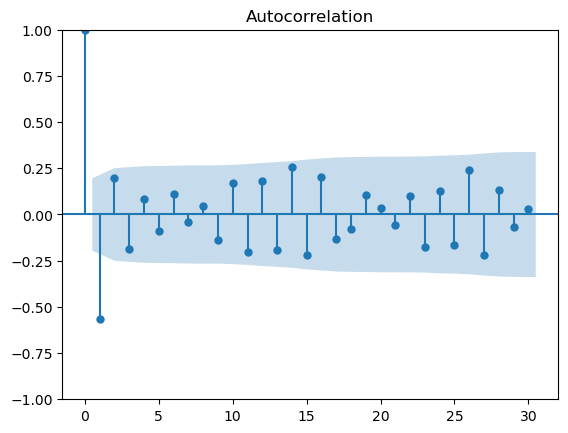

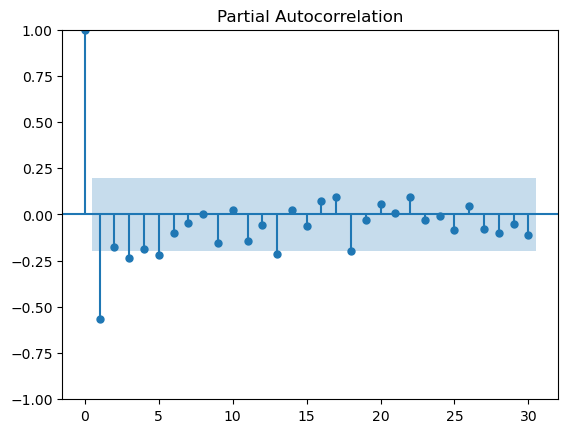

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Assuming you have a DataFrame named 'df' with 'Day' and 'Amount' columns
# Make sure the 'Day' column is in datetime format

# Check stationarity of the 'Amount' time series
def test_stationarity(timeseries):
    # Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])


# Check stationarity of the differenced series
test_stationarity(df['Amountdif'])

# Plot ACF and PACF to determine order of ARIMA model
plot_acf(df['Amountdif'], lags=30)
plt.show()

plot_pacf(df['Amountdif'], lags=30)
plt.show()



In [67]:
df.sort_values(by='Day', inplace=True)


# SARIMAX Report

C:\Users\Vaidik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vaidik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vaidik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vaidik\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Vaidik\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. 

                               SARIMAX Results                                
Dep. Variable:                 Amount   No. Observations:                  100
Model:                ARIMA(3, 2, 20)   Log Likelihood                -691.766
Date:                Thu, 18 Jan 2024   AIC                           1431.532
Time:                        13:36:55   BIC                           1493.571
Sample:                             0   HQIC                          1456.626
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.0743      1.662     -1.248      0.212      -5.332       1.184
ar.L2         -1.9455      1.992     -0.977      0.329      -5.850       1.959
ar.L3         -0.8325      1.542     -0.540      0.5

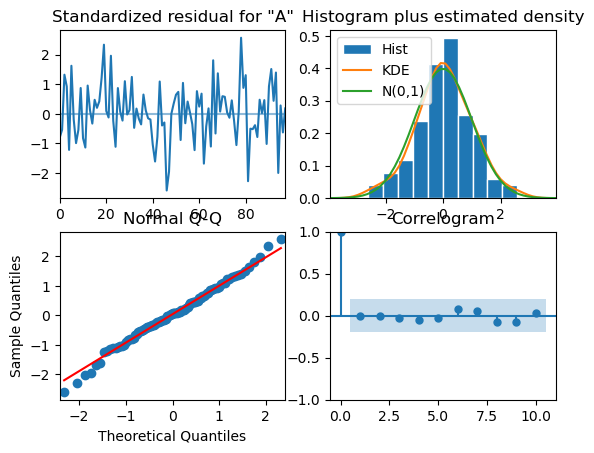

C:\Users\Vaidik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Vaidik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


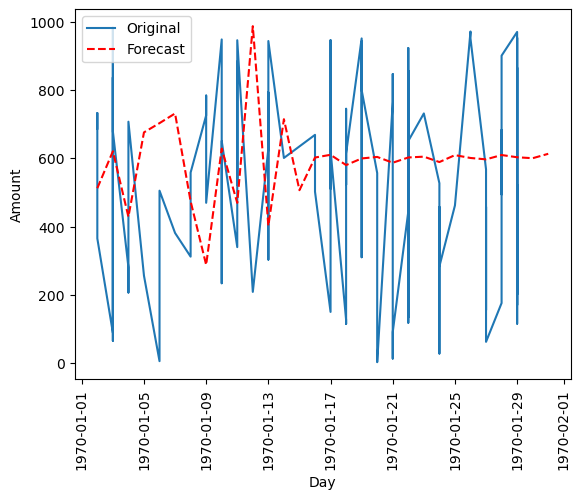

In [74]:
# Fit ARIMA model
p, d, q = 3, 2, 20  # Adjust these parameters based on ACF and PACF plots
model = ARIMA(df['Amount'], order=(p, d, q))
results = model.fit()

# Print model summary
print(results.summary())

# Plot the residuals
results.plot_diagnostics()
plt.show()

forecast_steps = 30  # Adjust the number of forecast steps as needed
forecast = results.forecast(steps=forecast_steps)

# Plot the original time series and forecast
plt.plot(df['Day'], df['Amount'], label='Original')
plt.plot(pd.date_range(start=df['Day'].max(), periods=forecast_steps + 1, freq='D')[1:], forecast, label='Forecast', linestyle='--', color='red')
plt.xlabel('Day')
plt.ylabel('Amount')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

In [69]:
df_new = df[["AnomalyScore","CustomerID" , "Amount" , "AccountBalance" ,"Year" , "Month" , "Day" , "Category" , "Transaaction Percent" , "Avg Amout Dev" , "Amount_PerMonth" , "Amountdif" ]]


# Scaling Of the Feature Columns 

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data and transform the 'Amount' column
df_new_scaled = scaler.fit_transform(df_new)



C:\Users\Vaidik\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Vaidik\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\Vaidik\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [77]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



# Reset the index to integers
#df_new_scaled.reset_index(drop=True, inplace=True)

# Instantiate and fit the Isolation Forest model
model_anom = IsolationForest(contamination=0.1, random_state=42)
model_anom.fit(df_new_scaled)

# Predict raw anomaly scores
raw_anomaly_scores = model_anom.decision_function(df_new_scaled)

# Normalize the anomaly scores to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_anomaly_scores = scaler.fit_transform(raw_anomaly_scores.reshape(-1, 1)).flatten()

# Add normalized anomaly scores to the dataframe
df_new["normalized_anomaly_scores"] = normalized_anomaly_scores

# Filter dataframe for anomaly scores between 0 and 1
filtered_anomalies_df = df_new[(df_new['normalized_anomaly_scores'] > 0) & (df_new['normalized_anomaly_scores'] < 1)]

# Visualize filtered anomaly scores
plt.scatter(filtered_anomalies_df.index, filtered_anomalies_df['Amount'], c=filtered_anomalies_df['normalized_anomaly_scores'], cmap='viridis')
plt.colorbar(label='Normalized Anomaly Score (0 to 1)')
plt.title('Anomaly Detection using Isolation Forest (Normalized)')
plt.xlabel('Transaction Index')
plt.ylabel('Amount')
plt.show()


ValueError: Input X contains NaN.
IsolationForest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
df_new

In [ ]:
plt.hist(filtered_anomalies_df['normalized_anomaly_scores'], bins=50, density=True , alpha=0.5, color='blue')
plt.title('Histogram of Normalised Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Density')
plt.show()










true_labels = df_User_new["AnomalyScore"]


In [ ]:
filtered_anomalies_df

In [ ]:
filtered_anomalies_df["isFraud"] = (filtered_anomalies_df["normalized_anomaly_scores"] >= 0.9).astype(int)


In [ ]:
filtered_anomalies_df

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

X = filtered_anomalies_df.drop("isFraud" , axis = 1 , inplace = False )

y = filtered_anomalies_df["isFraud"]
# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Calculate the ratio of negative to positive instances
ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Instantiate XGBoost classifier with the calculated scale_pos_weight
model = xgb.XGBClassifier(
    objective="binary:logistic",
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=2,
    min_child_weight=2,
    subsample=1,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0,
    reg_lambda=2,
    scale_pos_weight=ratio,  # Set scale_pos_weight to the calculated ratio
    early_stopping_rounds=10,
    random_state=2
)

# Train the model with early stopping using a validation set
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric="logloss", verbose=True)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Logloss values on the validation set during training
logloss_values = [0.34710, 0.34384, 0.34275, 0.34164, 0.31184, 0.28791, 0.27661, 0.27119, 0.25247, 0.23911,
                  0.24326, 0.24666, 0.23098, 0.21829, 0.21271, 0.20229, 0.19205, 0.18144, 0.17478, 0.17498,
                  0.16420, 0.16618, 0.15839, 0.15050, 0.14685, 0.13843, 0.13201, 0.13080, 0.13165, 0.12464,
                  0.12232, 0.11989, 0.11509, 0.11027, 0.10554, 0.10207, 0.09897, 0.09632, 0.09417, 0.09096,
                  0.09176, 0.08825, 0.08490, 0.08295, 0.07995, 0.07836, 0.07870, 0.07716, 0.07571, 0.07430]

# Create a line plot
plt.plot(logloss_values, marker='', linestyle='-')
plt.title('XGBoost Training Progress')
plt.xlabel('Iteration')
plt.ylabel('Validation Logloss')
plt.show()
